In [7]:
def n_queen(n, one_ans=False, to_print=True):
    def backtrack(row, path_cols, cols, main_diagonals, secondary_diagonals):
        if row == n:
            results.append(path_cols.copy())
            return

        if one_ans and len(results) > 0:
            return

        for col in range(n):
            # 剪枝
            if row == 1 and col >= n / 2:
                return

            d1 = row - col
            d2 = row + col

            if col in cols or d1 in main_diagonals or d2 in secondary_diagonals:
                continue

            path_cols.append(col)
            cols.add(col)
            main_diagonals.add(d1)
            secondary_diagonals.add(d2)

            backtrack(row + 1, path_cols, cols, main_diagonals, secondary_diagonals)

            path_cols.pop()
            cols.remove(col)
            main_diagonals.remove(d1)
            secondary_diagonals.remove(d2)

    # 以剪枝结果恢复全解
    def restore_form_prune():
        total_results = results.copy()
        for path in results:
            mirror = [n - 1 - col for col in path]
            total_results.append(mirror)

        if n % 2 != 0:
            total_results.pop()

        return total_results

    def print_n_queen(results_paths):
        for i, path_cols in enumerate(results_paths):
            print("第" + str(i + 1) + "个解法：")
            for row in range(n):
                for col in range(n):
                    if col == path_cols[row]:
                        print('Q ', end='')
                    else:
                        print('* ', end='')
                print("")
            print("")

    def n_valid():
        if n < 4:
            print("n 小于 4，请重试")
            return False
        return True

    
    if not n_valid():
        return

    results = []
    backtrack(0, [], set(), set(), set())
    results = restore_form_prune()

    if to_print:
        print("共" + str(len(results)) + "个解法")
        print_n_queen(results)

In [9]:
n_queen(4, False, True)

共2个解法
第1个解法：
* * Q * 
Q * * * 
* * * Q 
* Q * * 

第2个解法：
* Q * * 
* * * Q 
Q * * * 
* * Q * 



In [11]:
n_queen(8, False, True)

共92个解法
第1个解法：
* Q * * * * * * 
* * * Q * * * * 
* * * * * Q * * 
* * * * * * * Q 
* * Q * * * * * 
Q * * * * * * * 
* * * * * * Q * 
* * * * Q * * * 

第2个解法：
* * Q * * * * * 
Q * * * * * * * 
* * * * * * Q * 
* * * * Q * * * 
* * * * * * * Q 
* Q * * * * * * 
* * * Q * * * * 
* * * * * Q * * 

第3个解法：
* * * Q * * * * 
Q * * * * * * * 
* * * * Q * * * 
* * * * * * * Q 
* Q * * * * * * 
* * * * * * Q * 
* * Q * * * * * 
* * * * * Q * * 

第4个解法：
* * * Q * * * * 
Q * * * * * * * 
* * * * Q * * * 
* * * * * * * Q 
* * * * * Q * * 
* * Q * * * * * 
* * * * * * Q * 
* Q * * * * * * 

第5个解法：
* * * Q * * * * 
* Q * * * * * * 
* * * * Q * * * 
* * * * * * * Q 
* * * * * Q * * 
Q * * * * * * * 
* * Q * * * * * 
* * * * * * Q * 

第6个解法：
* * * Q * * * * 
* Q * * * * * * 
* * * * * * Q * 
* * Q * * * * * 
* * * * * Q * * 
* * * * * * * Q 
Q * * * * * * * 
* * * * Q * * * 

第7个解法：
* * * Q * * * * 
* Q * * * * * * 
* * * * * * Q * 
* * Q * * * * * 
* * * * * Q * * 
* * * * * * * Q 
* * * * Q * * * 
Q *

In [14]:
import time
from functools import wraps

In [16]:
def timer(func):
    """基础计时装饰器：打印函数运行耗时"""
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()   # 高精度计时开始
        result = func(*args, **kwargs)  # 执行目标函数
        end = time.perf_counter()      # 结束计时
        elapsed = end - start          # 计算耗时
        return elapsed
    return wrapper

In [18]:
@timer
def timing_n_queen(n):
    return n_queen(n, False, False)

In [20]:
time_5 = timing_n_queen(5)

In [22]:
print(time_5)

8.839997462928295e-05


In [24]:
import matplotlib.pyplot as plt

In [43]:
xs = range(4, 13)
ys = [timing_n_queen(i) for i in xs]

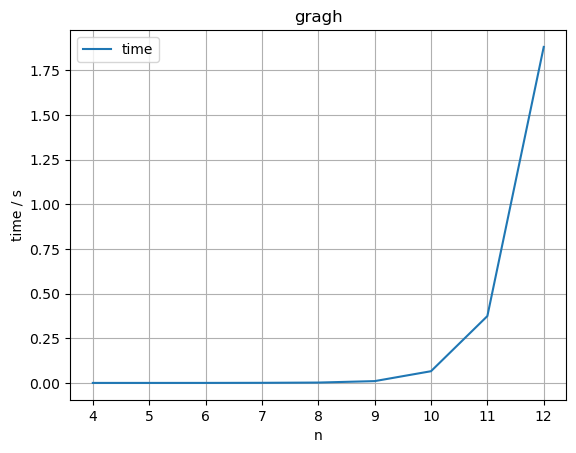

In [44]:
plt.plot(xs, ys, label="time")
plt.title("gragh")
plt.xlabel("n")
plt.ylabel("time / s")
plt.legend()
plt.grid(True)
plt.show()

与理论时间复杂度O(N!)相符​​​